In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = 'BTC-USD', start = '2020-03-11',end = '2022-07-10')
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-11,7910.089844,7950.814453,7642.812500,7911.430176,7911.430176,38682762605
2020-03-12,7913.616211,7929.116211,4860.354004,4970.788086,4970.788086,53980357243
2020-03-13,5017.831055,5838.114746,4106.980957,5563.707031,5563.707031,74156772075
2020-03-14,5573.077637,5625.226562,5125.069336,5200.366211,5200.366211,36154506008
2020-03-15,5201.066895,5836.645020,5169.283203,5392.314941,5392.314941,33997889639
2020-03-16,5385.229492,5385.229492,4575.357910,5014.479980,5014.479980,45368026430
2020-03-17,5002.578125,5371.348633,4981.909180,5225.629395,5225.629395,38622642935
2020-03-18,5227.113770,5331.833984,5069.335938,5238.438477,5238.438477,37878801016
2020-03-19,5245.416504,6329.735840,5236.968750,6191.192871,6191.192871,51000731797


In [92]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop([ 'Volume','Close', 'Date'], axis=1, inplace=True)

In [93]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(10)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,11778.894531,11898.038086,11408.593750,11601.472656,69.303032,10796.023110,9275.941583,8621.486927,149.492188,1,11754.045898
1,11604.553711,11800.064453,11558.431641,11754.045898,70.856635,10887.263376,9325.012955,8662.977774,-61.585938,0,11675.739258
2,11737.325195,11806.056641,11548.784180,11675.739258,68.938024,10962.356317,9371.561991,8702.881900,215.854492,1,11878.111328
3,11662.256836,12045.140625,11662.256836,11878.111328,71.104490,11049.571080,9421.196631,8744.937919,-471.122070,0,11410.525391
4,11881.647461,11932.710938,11195.708984,11410.525391,60.635106,11083.947681,9460.589280,8780.243713,180.337891,1,11584.934570
5,11404.596680,11748.396484,11249.605469,11584.934570,62.822730,11131.660718,9502.655524,8817.391937,195.732422,1,11784.137695
6,11588.405273,11796.396484,11216.872070,11784.137695,65.190051,11193.801382,9547.833388,8856.686582,-3.788086,0,11768.871094
7,11772.659180,12150.994141,11685.455078,11768.871094,64.850968,11248.569926,9591.814333,8895.258563,97.000977,1,11865.698242
8,11768.697266,11963.203125,11768.697266,11865.698242,66.050937,11307.344052,9636.841737,8934.602135,26.118164,1,11892.803711
9,11866.685547,11934.901367,11737.188477,11892.803711,66.395036,11363.102114,9681.514251,8973.783612,358.744141,1,12254.402344


In [94]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [95]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)
print(data_set_scaled.shape[0])

[[0.02864629 0.02648048 0.02642496 ... 0.5186015  1.         0.02824968]
 [0.02560981 0.02480397 0.02907858 ... 0.50441007 0.         0.02688629]
 [0.02792228 0.02490651 0.02890772 ... 0.52306324 1.         0.03040977]
 ...
 [0.18137346 0.19543896 0.18382194 ... 0.51486809 1.         0.20195939]
 [0.20034636 0.20473283 0.20084735 ... 0.50017202 0.         0.19954084]
 [0.20173403 0.19724122 0.20418574 ... 0.45942812 0.         0.18680029]]
702


In [103]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-3])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#print(X)
print(X.shape)
#print(y)
print(y.shape)

702
(672, 30, 8)
(672, 1)


In [104]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [105]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#print(y_train)

537
(537, 30, 8)
(135, 30, 8)
(537, 1)
(135, 1)


In [106]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
#inputs = LSTM(75, name='second_layer')(inputs)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
33/33 [==============================] - 2s 27ms/step - loss: 0.0691 - val_loss: 0.0194
Epoch 2/30
33/33 [==============================] - 0s 12ms/step - loss: 0.0194 - val_loss: 0.0100
Epoch 3/30
33/33 [==============================] - 0s 11ms/step - loss: 0.0156 - val_loss: 0.0090
Epoch 4/30
33/33 [==============================] - 0s 12ms/step - loss: 0.0146 - val_loss: 0.0093
Epoch 5/30
33/33 [==============================] - 0s 11ms/step - loss: 0.0138 - val_loss: 0.0100
Epoch 6/30
33/33 [==============================] - 0s 12ms/step - loss: 0.0142 - val_loss: 0.0101
Epoch 7/30
33/33 [==============================] - 0s 12ms/step - loss: 0.0139 - val_loss: 0.0079
Epoch 8/30
33/33 [==============================] - 0s 12ms/step - loss: 0.0148 - val_loss: 0.0101
Epoch 9/30
33/33 [==============================] - 0s 12ms/step - loss: 0.0137 - val_loss: 0.0117
Epoch 10/30
33/33 [==============================] - 0s 13ms/step - loss: 0.0136 - val_loss: 0.0085
Epoch 11/

In [107]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

5/5 [==============================] - 0s 6ms/step
[0.5195312] [0.50129397]
[0.5191298] [0.41516972]
[0.5198976] [0.8774743]
[0.52079475] [0.58654997]
[0.5185259] [0.47940514]
[0.5193374] [0.40948905]
[0.5219767] [0.28530091]
[0.5248003] [0.52550261]
[0.52698845] [0.4423789]
[0.5276419] [0.48385829]


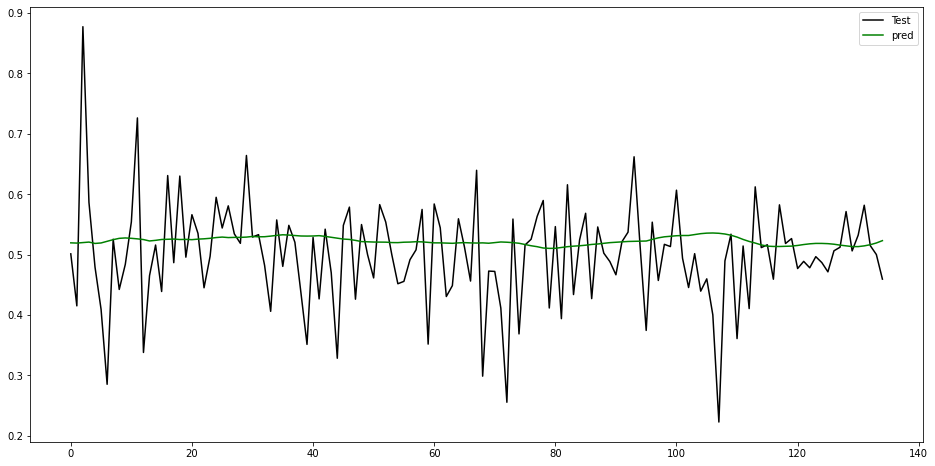

In [108]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()